<center><img src="https://github.com/hse-ds/iad-applied-ds/blob/master/2021/hw/hw1/img/logo_hse.png?raw=1" width="1000"></center>

<h1><center>Прикладные задачи анализа данных</center></h1>
<h2><center>Домашнее задание 3: Прогнозирование временных рядов</center></h2>

# Введение

В этом задании Вам предстоит разобраться с основами анализа и прогнозирования временных рядов. 


![image](https://imgs.xkcd.com/comics/extrapolating.png)

In [8]:
!pip install orbit-ml
!pip install prophet
!pip install sktime[all_extras]

     |████████████████████████████████| 466 kB 4.4 MB/s 
     |████████████████████████████████| 11.2 MB 47.7 MB/s 
     |████████████████████████████████| 718 kB 37.8 MB/s 
     |████████████████████████████████| 9.8 MB 26.8 MB/s 
     |████████████████████████████████| 930 kB 46.6 MB/s 
     |████████████████████████████████| 750.6 MB 11 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of t

     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 45 kB 2.7 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640289 sha256=5fe1f67c783049ae6c17d88b8143d3c3bcdc1b38e0768f51c6e328bec38f4ea0
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
     |████████████████████████████████| 6.6 MB 3.6 MB/s 
     |████████████████████████████████| 3.3 MB 38.4 

In [1]:
%matplotlib inline

from IPython import display
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


## Задание 1 (1 балл). Поиск и предобработка данных.

В этом задании Вам необходимо _самостоятельно_ найти два временных ряда: один должен обладать месячной частотой, а второй — дневной.

Мы советуем поискать соответствующие временные ряды на платформе [kaggle](https://www.kaggle.com/datasets) или же взять один из [популярных](https://medium.com/analytics-vidhya/10-time-series-datasets-for-practice-d14fec9f21bc) временных рядов для анализа. 

**Не рекомендуется** использовать в качестве временных рядов цены финансовых инструментов в силу плохой предсказуемости изменения цен. **Запрещается** использовать готовые наборы данных из библиотек для анализа временных рядов, например, `from orbit.utils.dataset import load_iclaims`.

![bitcoin](https://avatars.mds.yandex.net/get-zen_doc/3417386/pub_6017dd4b8d30cb1780864ae0_6017f4aa8d30cb1780bf66ce/scale_1200)




В качестве отчета по заданию:

* Опишите источники временных рядов (ссылки на страницы скачивания). В случае, если данные требовали дополнительной обработки, приведите код этой обработки, загрузите данные в личное облачное хранилище и приведите ссылку на скачивание. Процесс получения временных рядов должен быть **четко** расписан и полностью **воспроизводиться**. 

* Приведите код считывания временных рядов из файлов и разделения на train/test. Соотношение размеров train/test на Ваше усмотрение, но мы советуем Вам выбрать 80% на 20%, если в test остаётся хотя бы пара лет наблюдений.



In [2]:
# скачаем данные
!wget https://github.com/rishabh89007/Time_Series_Datasets/raw/main/Imports%20Crude%20Oil.csv 
# Imports of all grades of crude oil from World to Total U.S. (US), Monthly (‘Imports Crude Oil.csv’). Датасет с месячной частотой. 
!wget https://github.com/rishabh89007/Time_Series_Datasets/raw/main/Nuclear%20Capacity.csv
# U.S. nuclear capacity, daily (‘Nuclear Capacity.csv’). Датасет с дневной частотой. 

--2022-04-25 06:32:02--  https://github.com/rishabh89007/Time_Series_Datasets/raw/main/Imports%20Crude%20Oil.csv
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Imports%20Crude%20Oil.csv [following]
--2022-04-25 06:32:03--  https://raw.githubusercontent.com/rishabh89007/Time_Series_Datasets/main/Imports%20Crude%20Oil.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2562 (2.5K) [text/plain]
Saving to: ‘Imports Crude Oil.csv’

Imports Crude Oil.c 100%[===================>]   2.50K  --.-KB/s    in 0s      

2022-04-25 06:32:03 (34.4 MB/s) - ‘Imports Crude O

In [3]:
# считаем файлы
ts1 = pd.read_csv('Imports Crude Oil.csv', skiprows=[0], names = ['date', 'thousand barrels'])
ts2 = pd.read_csv('Nuclear Capacity.csv', skiprows=[0], names = ['date', 'nuclear capacity'])

In [4]:
ts1.date = pd.to_datetime(ts1.date)
ts1.head()

,date,thousand barrels
0,2009-01-01,317275
1,2009-02-01,262339
2,2009-03-01,303897
3,2009-04-01,285934
4,2009-05-01,281147


In [5]:
ts2.date = pd.to_datetime(ts2.date, format='%Y %m%d %S').dt.date # Был какой-то бред с форматом времени
ts2.head()

,date,nuclear capacity
0,2007-01-01,101764.9
1,2007-01-02,101764.9
2,2007-01-03,101764.9
3,2007-01-04,101764.9
4,2007-01-05,101764.9


In [6]:
# сделаем разбиение на train/test
ts1_test_size = round(ts1.shape[0] * 0.20)
ts2_test_size = round(ts2.shape[0] * 0.20)

ts1_train = ts1[:-ts1_test_size]
ts1_test = ts1[-ts1_test_size:]

ts2_train = ts2[:-ts2_test_size]
ts2_test = ts2[-ts2_test_size:]

## Задание 2. Анализ временных рядов (1 балл).

* Отрисуйте временные ряды и визуально сделайте различимым разбиение на выборки — либо вертикальной чертой, либо разными цветами.

* Постройте графики [автокорреляционных функций](https://www.machinelearningmastery.ru/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788/) для выбранных временных рядов. Прокомментируйте их: являются ли временные ряды сезонными? Видна ли на графиках длина сезонной составляющей ряда?

* В случае присутствия сезонности, разбейте временной ряд на повторяющиеся фрагменты и нарисуйте их наложенными для иллюстрации этой сезонности.

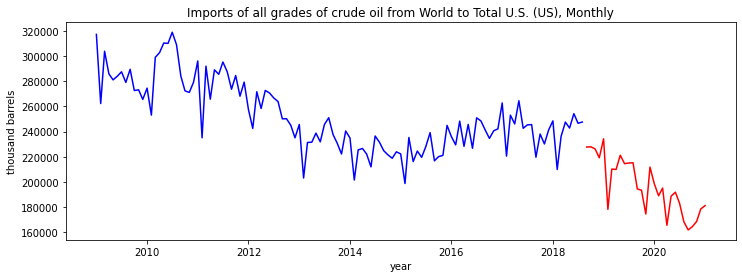

In [ ]:
# отрисуем временные ряды
fig, ax = plt.subplots(figsize=(12, 4))
plt.title('Imports of all grades of crude oil from World to Total U.S. (US), Monthly')
ax1 = plt.plot(ts1_train['date'], ts1_train['thousand barrels'].values, color = 'b')
ax2 = plt.plot(ts1_test['date'], ts1_test['thousand barrels'].values, color = 'r')
ax.set_ylabel('thousand barrels')
ax.set_xlabel('year')
plt.show()

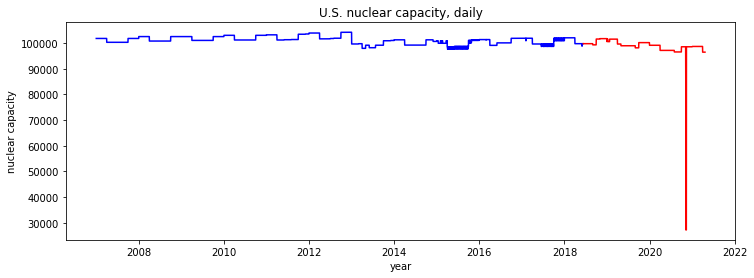

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
plt.title('U.S. nuclear capacity, daily')
ax1 = plt.plot(ts2_train['date'], ts2_train['nuclear capacity'].values, color = 'b')
ax2 = plt.plot(ts2_test['date'], ts2_test['nuclear capacity'].values, color = 'r')
ax.set_ylabel('nuclear capacity')
ax.set_xlabel('year')
plt.show()

In [104]:
# посчитайте и нарисуйте график автокорреляционной функции

In [101]:
from statsmodels.tsa.stattools import acf
import statsmodels.api as sm

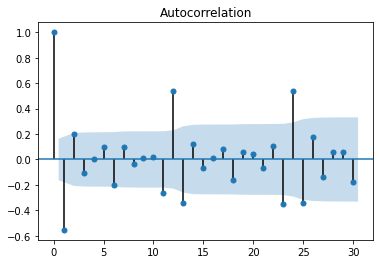

In [ ]:
ts1["barrels_shift"] = ts1['thousand barrels'].shift()
ts1["barrels_diff"] = ts1['thousand barrels'] - ts1["barrels_shift"]
sm.graphics.tsa.plot_acf(ts1["barrels_diff"][1:], lags=30)
plt.show()

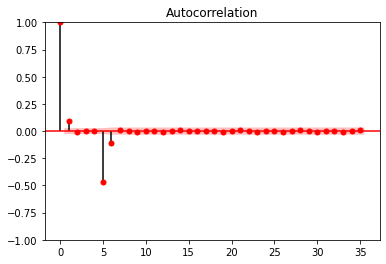

In [103]:
ts2["capacity_shift"] = ts2['nuclear capacity'].shift()
ts2["capacity_diff"] = ts2['nuclear capacity'] - ts2["capacity_shift"]
sm.graphics.tsa.plot_acf(ts2["capacity_diff"][1:], lags=35)
plt.show()

Да, ряды являются сезонными. Для месячного ряда, прослеживается периодичность 12 месяцев. Во втором ряду также можно выделить сезонную составляющую, но наличие сезонности легче заметить из визуализации ряда, чем из графика автокорреляционной функции. 

In [ ]:
# разбейте временной ряд на повторяющиеся участки по длине сезонной составляющей и нарисуйте их наложенными

In [98]:
from cycler import cycler

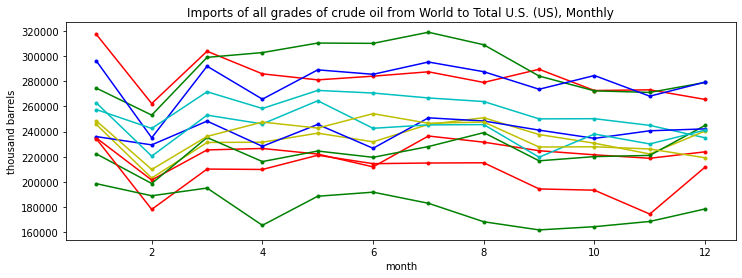

In [ ]:
plt.figure(figsize=(12, 4))
plt.title('Imports of all grades of crude oil from World to Total U.S. (US), Monthly')
for i in range(0, (ts1.shape[0] // 12 * 12), 12):
  plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'c', 'y'])))
  plt.plot(ts1[0:12]['date'].dt.month, ts1.iloc[i:i+12]['thousand barrels'], marker='.')
plt.ylabel('thousand barrels')
plt.xlabel('month')
plt.show()

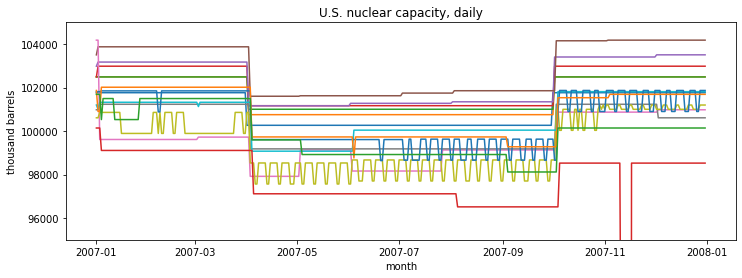

In [99]:
plt.figure(figsize=(12, 4))
plt.title('U.S. nuclear capacity, daily')
for i in range(0, (ts2.shape[0] // 365 * 365), 365):
  plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'c', 'y'])))
  plt.plot(ts2[0:365]['date'], ts2.iloc[i:i+365]['nuclear capacity'])
plt.ylabel('thousand barrels')
plt.xlabel('month')
plt.ylim(bottom=95000,top=105000)
plt.show()

## Задание 3. Предсказание месячного временного ряда (4 балла).

В этом задании Вам предстоит попробовать предсказать месячный временной ряд несколькими готовыми моделями со скользящим или растущим окном и выбрать среди них наилучшую.

В качестве метрики сравнения используйте MAE между истинными и предсказанными значениями ряда на тестовом отрезке.

### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [9]:
from sktime.forecasting.naive import NaiveForecaster
from sklearn.metrics import mean_absolute_error

In [ ]:
# ваш код обучения моделей здесь
NaiveForecaster = NaiveForecaster(strategy="drift")
NaiveForecaster.fit(ts1_train['thousand barrels'])


NaiveForecaster(strategy='drift')

In [ ]:
# посчитайте метрики на test
ts1_pred_NF = NaiveForecaster.predict(fh=[i for i in range(ts1_test_size)])
print('MAE = ', round(mean_absolute_error(ts1_test['thousand barrels'], ts1_pred_NF)))

MAE =  42227


### ARIMA/AutoArima (1 балл).

Обучите из библиотеки `sktime` модели:

* SARIMA(1, 1, 1)(1, 0, 0)[12] (`ARIMA` в `sktime`)
* Алгоритм Хиндмана-Хандакара подбора SARIMA (`AutoARIMA` в `sktime`)

In [ ]:
from sktime.forecasting.arima import ARIMA, AutoARIMA

# ваш код обучения моделей здесь
ARIMA = ARIMA(
    order=(1, 1, 1),
    seasonal_order=(1, 0, 0, 12),
    suppress_warnings=True)
ARIMA.fit(ts1_train['thousand barrels'])

ARIMA(order=(1, 1, 1), seasonal_order=(1, 0, 0, 12), suppress_warnings=True)

In [ ]:
AutoARIMA = AutoARIMA(suppress_warnings=True)
AutoARIMA.fit(ts1_train['thousand barrels'])

AutoARIMA(suppress_warnings=True)

In [ ]:
# посчитайте метрики на test
ts1_pred_ARIMA = ARIMA.predict(fh=[i for i in range(ts1_test_size)])
print('MAE ARIMA = ', round(mean_absolute_error(ts1_test['thousand barrels'], ts1_pred_ARIMA)))

ts1_pred_AutoARIMA = AutoARIMA.predict(fh=[i for i in range(ts1_test_size)])
print('MAE AutoARIMA = ', round(mean_absolute_error(ts1_test['thousand barrels'], ts1_pred_AutoARIMA)))

MAE ARIMA =  42274
MAE AutoARIMA =  50585


/usr/local/lib/python3.7/dist-packages/pmdarima/arima/arima.py:692: UserWarning: As of version 1.5.0 'typ' is no longer a valid arg for predict. In future versions this will raise a TypeError.
  warnings.warn("As of version 1.5.0 'typ' is no longer a valid "


### LGT/DLT (1 балл).

Обучите из библиотеки `orbit` модели LGT и DLT

In [10]:
from orbit.models import LGT
from orbit.models import DLT


In [ ]:
dlt = DLT(
    response_col='thousand barrels', 
    date_col='date',
    seasonality=12,
)

dlt.fit(df=ts1_train)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_05ff738ef22ce2e8a332ce639cee65cf NOW.


In [ ]:
lgt = LGT(
    response_col='thousand barrels', 
    date_col='date',
    seasonality=12,
)

lgt.fit(df=ts1_train)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_d372bb7bc77e1df83218127fc9dd707d NOW.


In [ ]:
# посчитайте метрики на test
ts1_pred_DLT = dlt.predict(df=ts1_test)
print('MAE DLT = ', round(mean_absolute_error(ts1_test['thousand barrels'], ts1_pred_DLT['prediction'])))

ts1_pred_LGT = lgt.predict(df=ts1_test)
print('MAE LGT = ', round(mean_absolute_error(ts1_test['thousand barrels'], ts1_pred_LGT['prediction'])))


MAE DLT =  42856
MAE LGT =  41419


### ETS (1 балл).

Обучите из библиотеки `sktime` модели:

* ETS(AAA) (`ExponentialSmoothing` в `sktime`)
* ETS с автоматическим выбором по AIC (`AutoETS` в `sktime`)

In [11]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS

In [ ]:

# ваш код обучения моделей здесь

ETS_AAA = ExponentialSmoothing(trend='add', seasonal='add', sp=12)
ETS_AAA.fit(ts1_train['thousand barrels'])

AutoETS = AutoETS(auto=True, n_jobs=-1, sp=12)
AutoETS.fit(ts1_train['thousand barrels'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


AutoETS(auto=True, n_jobs=-1, sp=12)

In [ ]:
# посчитайте метрики на test
ts1_pred_ETS_AAA = ETS_AAA.predict(fh=[i for i in range(ts1_test_size)])
print('MAE ETS_AAA = ', round(mean_absolute_error(ts1_test['thousand barrels'], ts1_pred_ETS_AAA)))

ts1_pred_AutoETS = AutoETS.predict(fh=[i for i in range(ts1_test_size)])
print('MAE AutoETS = ', round(mean_absolute_error(ts1_test['thousand barrels'], ts1_pred_AutoETS)))

MAE ETS_AAA =  38738
MAE AutoETS =  42665


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения. В `sktime` `ETS` модель пока ещё не выдаёт доверительные интервалы, но при желании до них можно дотянуться :)

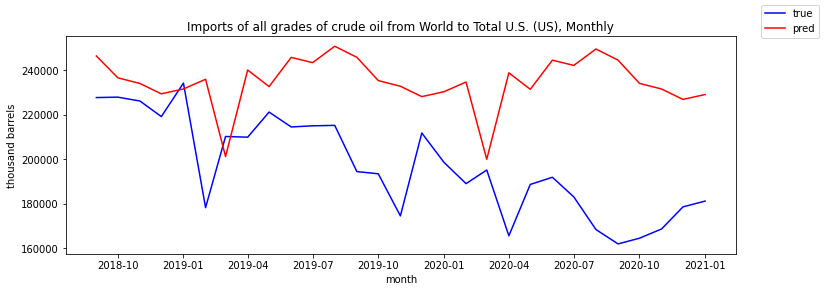

In [ ]:
# нарисуйте пресказания

fig, ax = plt.subplots(figsize=(12, 4))
plt.title('Imports of all grades of crude oil from World to Total U.S. (US), Monthly')
ax1 = plt.plot(ts1_test['date'], ts1_test['thousand barrels'].values, color = 'b')
ax2 = plt.plot(ts1_test['date'], ts1_pred_ETS_AAA, color = 'r')
fig.legend(labels=('true','pred'))
plt.ylabel('thousand barrels')
plt.xlabel('month')
plt.show()


## Задание 4. Предсказание дневного временного ряда (3 балла).

В этом задании Вам предстоит попробовать предсказать выбранный Вами дневной временной ряд.

Аналогично, в качестве метрики используем MAE.



### NaiveForecaster из sktime (1 балл).

Посчитайте предсказания следующими двумя наивными способами:

* $\hat{y}_{t+1} = y_{t}$
* $\hat{y}_{t+1} = y_{t-seasonality+1}$

In [13]:
from sktime.forecasting.naive import NaiveForecaster

# ваш код обучения моделей здесь
NaiveForecaster = NaiveForecaster(strategy="drift")
NaiveForecaster.fit(ts2_train['nuclear capacity'])

NaiveForecaster(strategy='drift')

In [14]:
# посчитайте метрики на test
ts2_pred_NF = NaiveForecaster.predict(fh=[i for i in range(ts2_test_size)])
print('MAE = ', round(mean_absolute_error(ts2_test['nuclear capacity'], ts2_pred_NF)))

MAE =  1495


### KTR из orbit (1 балл).



In [16]:
from orbit.models.ktrlite import KTRLite

In [18]:
# ваш код обучения моделей здесь
KTR = KTRLite(
    response_col='nuclear capacity', 
    date_col='date',
    seasonality=12,
)

KTR.fit(df=ts2_train)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ce583eb84b35032d795f7056cd3c761e NOW.


In [19]:
# посчитайте метрики на test
ts2_pred_KTR = KTR.predict(df=ts2_test)
print('MAE KTR = ', round(mean_absolute_error(ts2_test['nuclear capacity'], ts2_pred_KTR['prediction'])))


MAE KTR =  3018


### Phophet (1 балл).



In [24]:
ts2_train_prophet = ts2_train[['date', 'nuclear capacity']]
ts2_train_prophet.columns = ['ds', 'y']
ts2_train_prophet.head()

,ds,y
0,2007-01-01,101764.9
1,2007-01-02,101764.9
2,2007-01-03,101764.9
3,2007-01-04,101764.9
4,2007-01-05,101764.9


In [25]:
from prophet import Prophet

# ваш код обучения моделей здесь
PRO = Prophet(interval_width=0.9)

PRO.fit(df=ts2_train_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [27]:
# посчитайте метрики на test
ts2_test_prophet = ts2_test[['date', 'nuclear capacity']]
ts2_test_prophet.columns = ['ds', 'y']

ts2_pred_PRO = PRO.predict(ts2_test_prophet)
print('MAE PRO = ', round(mean_absolute_error(ts2_test['nuclear capacity'], ts2_pred_PRO['yhat'])))

MAE PRO =  2111


Нарисуйте для наилучшей модели предсказания с доверительным интервалом (если модель выдает его) и наложите их на истинные значения.

In [38]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 4.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbit-ml 1.1.1 requires matplotlib>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


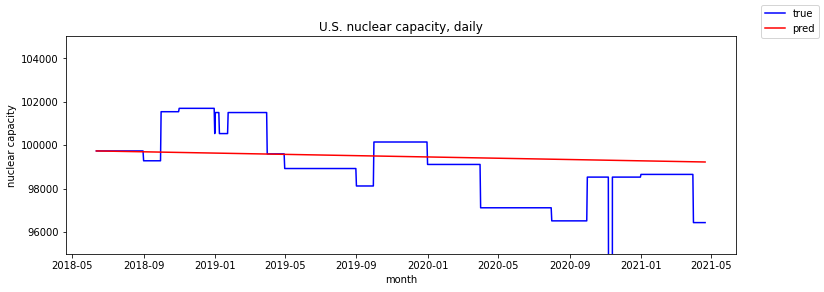

In [40]:
# нарисуйте пресказания
fig, ax = plt.subplots(figsize=(12, 4))
plt.title('U.S. nuclear capacity, daily')
ax1 = plt.plot(ts2_test['date'], ts2_test['nuclear capacity'].values, color = 'b')
ax2 = plt.plot(ts2_test['date'], ts2_pred_NF, color = 'r')
fig.legend(labels=('true','pred'))
plt.ylabel('nuclear capacity')
plt.xlabel('month')
plt.ylim(bottom=95000,top=105000) # Есть какой-то выброс в 2020, он сильно сбивает масштаб графика
plt.show()

Лучше всего с предсказанием на большой промежуток времени справляется NaiveForecaster. Но, если ограничить тест 2-6 месяцами, лучшие результаты будут у Prophet. 

Text(0.5, 69.0, 'month')

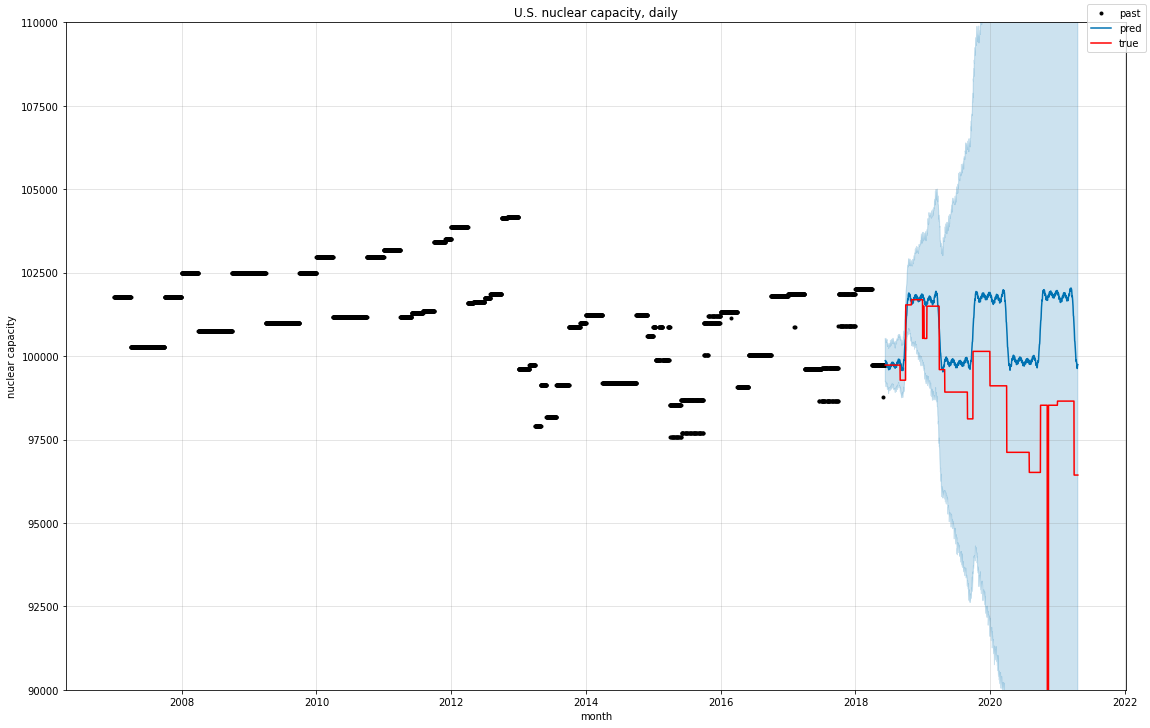

In [70]:
fig = PRO.plot(ts2_pred_PRO, figsize=(16, 10))
plt.plot(ts2_test['date'], ts2_test['nuclear capacity'].values, color = 'r')
plt.ylim(bottom=90000,top=110000)
plt.title('U.S. nuclear capacity, daily')
fig.legend(labels=('past','pred','true'))
plt.ylabel('nuclear capacity')
plt.xlabel('month')

## Задание 5. Предсказание временного ряда моделями машинного обучения (1 балл).

Возьмите один из ваших рядов, сформируйте по нему матрицу объект-признак и целевой вектор.

Разбейте данные на train/test в той же пропорции, что разбивали в заданиях выше.

Обучите различные классические модели машинного обучения и оцените их качество (MAE). 

Какая из моделей справилась с задачей предсказания лучше всего?

In [95]:
# обучите классические модели ML

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [91]:
ts1_train_X = np.array(pd.to_numeric(ts1_train['date'])).reshape(-1, 1)
ts1_train_y = np.array(ts1_train['thousand barrels']).reshape(-1, 1)
ts1_test_X = np.array(pd.to_numeric(ts1_test['date'])).reshape(-1, 1)

In [92]:
lr = LinearRegression().fit(ts1_train_X, ts1_train_y)
ts1_pred_lr = lr.predict(ts1_test_X)
print('MAE LinearRegression = ', round(mean_absolute_error(ts1_test['thousand barrels'], ts1_pred_lr)))

MAE LinearRegression =  18673


In [94]:
dt_reg = DecisionTreeRegressor().fit(ts1_train_X, ts1_train_y)
ts1_pred_dt_reg = dt_reg.predict(ts1_test_X)
print('MAE DecisionTreeRegressor = ', round(mean_absolute_error(ts1_test['thousand barrels'], ts1_pred_dt_reg)))

MAE DecisionTreeRegressor =  50758


In [96]:
rf_reg = RandomForestRegressor().fit(ts1_train_X, ts1_train_y)
ts1_pred_rf_reg = rf_reg.predict(ts1_test_X)
print('MAE RandomForestRegressor = ', round(mean_absolute_error(ts1_test['thousand barrels'], ts1_pred_rf_reg)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


MAE RandomForestRegressor =  50652


Из опробованных модлей машинного обучения лучше всего справляется модель LinearRegression. 

---





## Бонус. Напишите свою модель на STAN (3 балла).

Разработайте и испытайте свою модель для месячного ряда в STAN.

Сравните качество прогнозов с наивной сезонной моделью на тестовой выборке с помощью MAE. 

Комментарий: итоговый балл за домашнее задание ставится по формуле минимум(10, ваш суммарный балл за задания).

In [ ]:
# ваш код модели на STAN и её обучения здесь

In [ ]:
# посчитайте метрики на test

In [ ]:
# нарисуйте предсказания